In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import TimeTag
import Visibility as vis

#### Parameters 

In [2]:
ch_det = 2 # Channel for single photon detector
ch_AWG = 0 # Channel for AWG trigger
ch_piezo = 3 # Channel for piezo trigger

t_integration = 10 # Integration time for measurement

### Save Data (time tags)

In [20]:
filename = TimeTag.save_timetags(ch_det, ch_AWG, ch_piezo,t_integration)

153427




In [4]:
print(filename)
hello

c:\Users\LocalAdmin\Imperial College London\UQOG Quantum Memories - PH - General\Data\2024-02\2024-02-28_TimeBinQubit\2024-02-28_145920


### Import Data

In [10]:
folder = 'C:\\Users\\LocalAdmin\\Imperial College London\\UQOG Quantum Memories - PH - General\\Data\\2024-02\\2024-02-28_TimeBinQubit'
filename = folder + os.sep + '2024-02-28_153427.ttbin'

channels, timestamps = TimeTag.load_tt_data(filename)

In [11]:
times_AWG = timestamps[np.where(channels==ch_AWG)[0]]
average_AWG_duration = np.mean(np.diff(times_AWG))
AWG_rate = 1/(average_AWG_duration*1e-12)
print('AWG rep rate = ', AWG_rate)

laser_rep = AWG_rate*160
print('Laser rep rate = ', laser_rep)

AWG rep rate =  500829.9499182678
Laser rep rate =  80132791.98692285


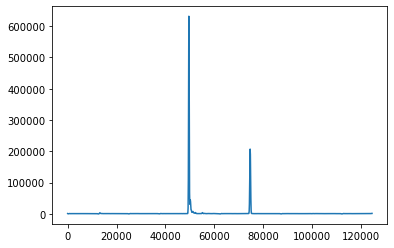

In [12]:
binwidth = 100 # histogram bin width in ps
t_hist, counts_hist = vis.build_histogram(channels,timestamps, ch_AWG, ch_det,binwidth,laser_rep)

plt.plot(t_hist,counts_hist)
plt.show()

In [49]:
binwidth = 100
ch_det = 2 # Channel for single photon detector
ch_AWG = 0 # Channel for AWG trigger
ch_piezo = 3 # Channel for piezo trigger

num_time_windows = 1
starting_scan_number = 1 
num_piezo_scans_to_av = 10
num_phase_bins = 21
t_offset = 85*1000 
pulse_duration = 7*1000
# laser_rep = 80132791.98692285

# sum_early_bin, sum_interference_bin, sum_late_bin = 
sum_ROIs,hist_t,hist_y = vis.vis_piezo_scan(channels,timestamps,ch_piezo,ch_det,ch_AWG,binwidth,num_time_windows,num_piezo_scans_to_av, num_phase_bins,t_offset,pulse_duration,laser_rep)

# vis_piezo_scan(channels,times,ch_piezo,ch_det,ch_AWG,binwidth,num_time_windows, num_piezo_scans_to_av, num_phase_bins,t_offset,pulse_duration):
    

[[460. 530.]]


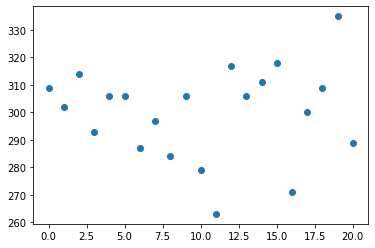

In [50]:
for i in range(1):
    plt.plot(sum_ROIs[0,i,:],'o')


In [46]:
np.sqrt(300)/300

0.05773502691896258

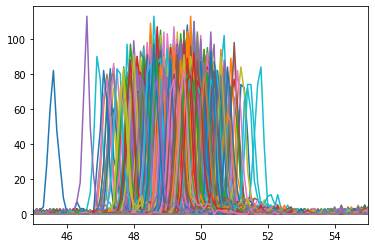

In [32]:
for i in range(21):
    for j in range(98):
        plt.plot(hist_t[j,i,:]/1000,hist_y[j,i,:])
plt.xlim(45,55)
plt.show()